In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
plt.style.use(['dark_background'])
plt.suptitle('figure title', color='w')
import warnings
warnings.filterwarnings('ignore')

<Figure size 576x360 with 0 Axes>

In [3]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
df = pd.read_csv('DATA/forProcessing.csv')
df_a = df.dropna()
X = df_a.drop('receive_pressure', axis = 1)
y = df_a['receive_pressure']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
lm = LinearRegression()

In [7]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
lm.intercept_

5.531883354067968

In [9]:
pd.DataFrame(list(zip(x_train.columns, lm.coef_)), columns = ["Features", "Coefficients"])

,Features,Coefficients
0,diameter,0.003088
1,depth,0.071788
2,buffer_pressure,-0.062328
3,line_pressure,0.328453
4,dynamic_height,-0.073634
5,annulus_pressure,0.739894
6,water_cut,-0.007350


In [10]:
y_pred = lm.predict(x_test)

In [11]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print('The RMSE is:', mean_squared_error(y_test, y_pred), " and the MAE is: ", mean_absolute_error(y_test, y_pred))
print("The MAPE is: ", MAPE)

The RMSE is: 67.29847451340221  and the MAE is:  3.812882116225633
The MAPE is:  15.358611339952505


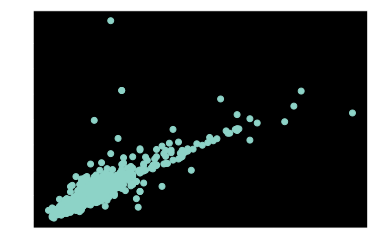

In [12]:
plt.scatter(y_test, y_pred)